In [3]:
import numpy as np
import glob

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

In [5]:
cover_img = glob.glob('../Cover/*.jpg')
jmipod_img = glob.glob('../JMiPOD/*.jpg')

In [6]:
len(cover_img)

75000

In [7]:
len(jmipod_img)

75000

In [8]:
import cv2

In [9]:
import matplotlib.pylab as plt

In [10]:
cover_img[0]

'../Cover/34055.jpg'

In [48]:
index = 10000
cover = cv2.imread(cover_img[index], -1)
# cover = cv2.cvtColor(cover, cv2.COLOR_BGR2RGB)
jmipod = cv2.imread(jmipod_img[index])
# jmipod = cv2.cvtColor(jmipod, cv2.COLOR_BGR2RGB)

In [51]:
cover

array([[[107, 141, 170],
        [118, 136, 173],
        [133, 151, 188],
        ...,
        [  9,  46,  72],
        [ 24,  55,  88],
        [ 20,  47,  81]],

       [[131, 147, 164],
        [132, 144, 168],
        [119, 142, 164],
        ...,
        [  0,  52,  75],
        [ 16,  46,  93],
        [ 42,  51,  84]],

       [[130, 146, 158],
        [140, 152, 164],
        [137, 153, 165],
        ...,
        [ 20,  59,  68],
        [ 32,  53,  74],
        [ 50,  59,  79]],

       ...,

       [[123, 141, 164],
        [125, 137, 165],
        [103, 120, 153],
        ...,
        [ 66,  71,  96],
        [ 59,  69, 103],
        [ 56,  56,  92]],

       [[119, 146, 172],
        [124, 138, 157],
        [116, 129, 155],
        ...,
        [ 59,  73,  92],
        [ 59,  71,  95],
        [ 62,  64,  95]],

       [[111, 146, 179],
        [150, 144, 175],
        [138, 140, 175],
        ...,
        [ 64,  80,  92],
        [ 61,  72,  86],
        [ 58,  65,  92]]

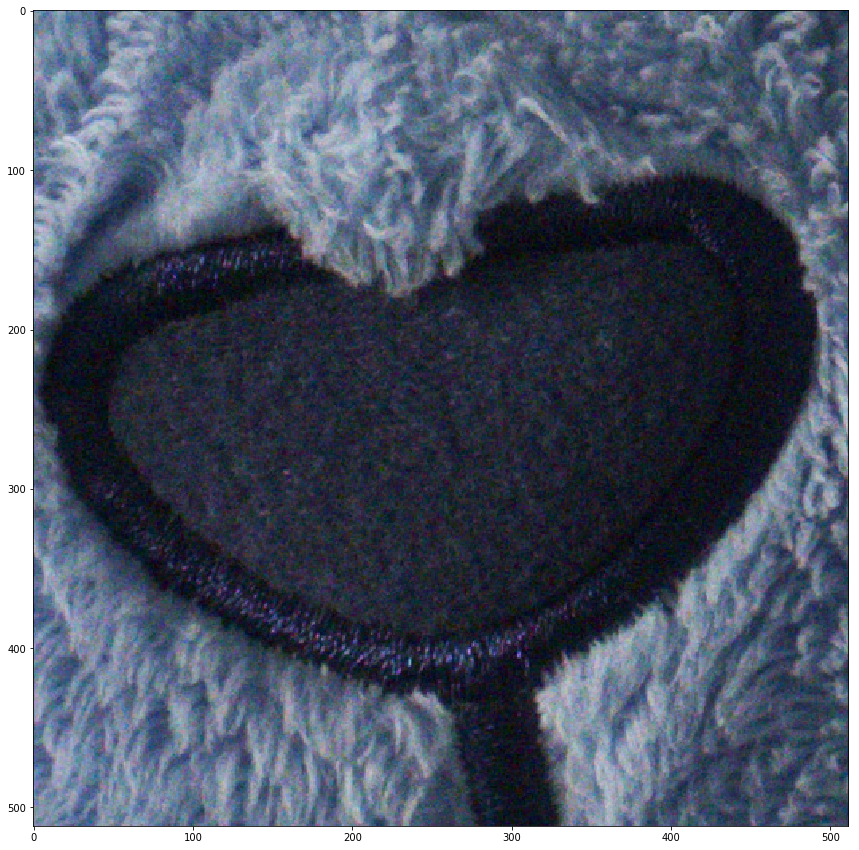

In [49]:
plt.imshow(cover)

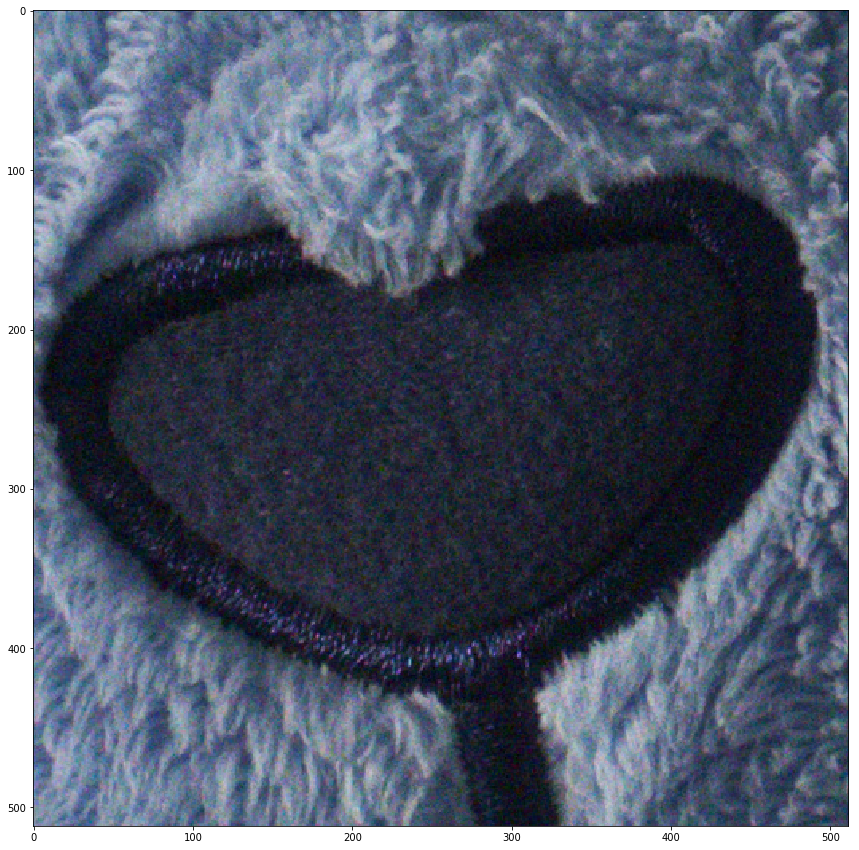

In [50]:
plt.imshow(jmipod)

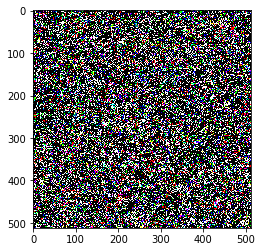

In [44]:
change = cover - jmipod
plt.imshow(change)

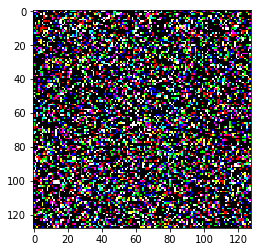

In [45]:
change = cv2.resize(cover, (128, 128)) - cv2.resize(jmipod, (128, 128))
plt.imshow(change)

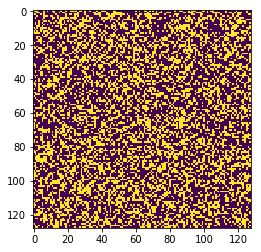

In [40]:
plt.imshow(np.max(change, axis=2))

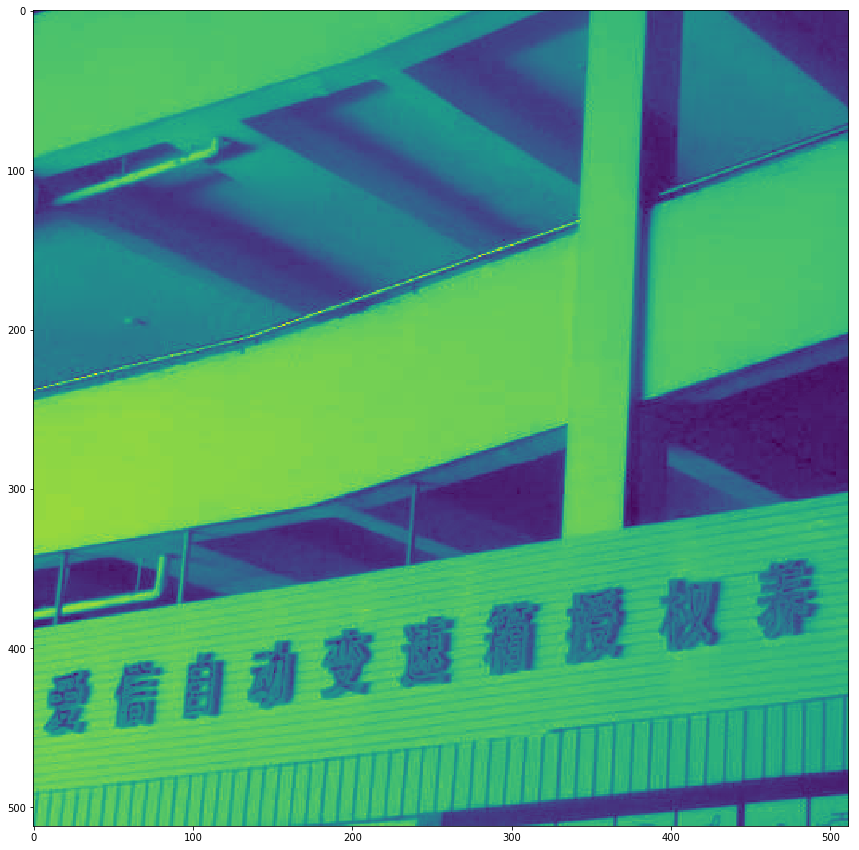

In [55]:
plt.imshow(np.min(jmipod, axis=2))

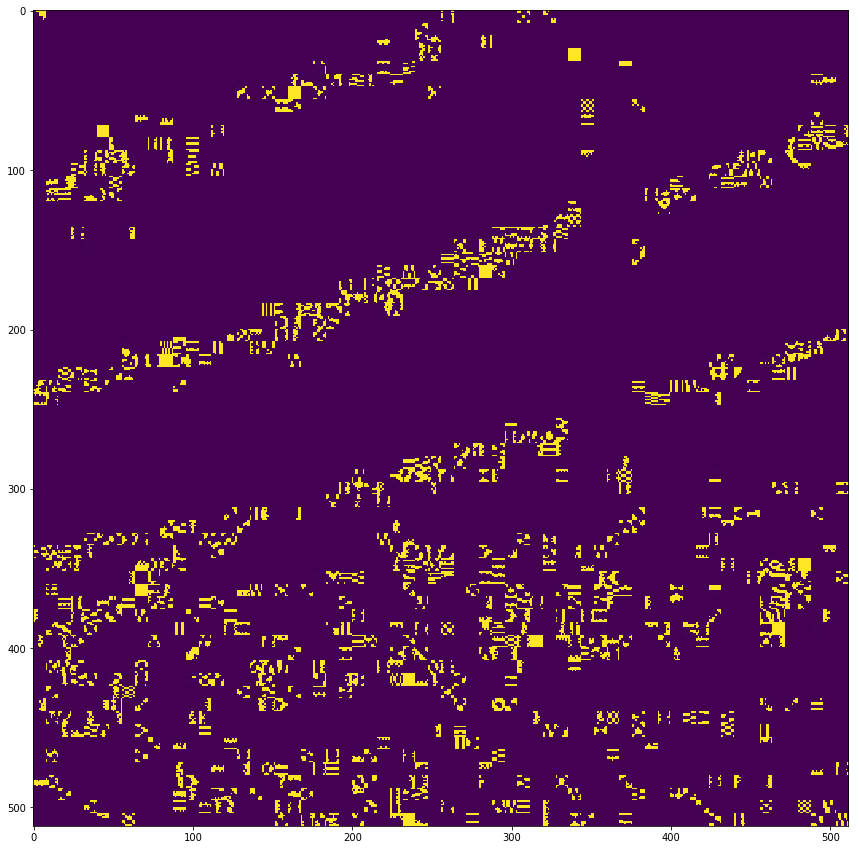

In [56]:
plt.imshow(np.min(cover, axis=2) - np.min(jmipod, axis=2))

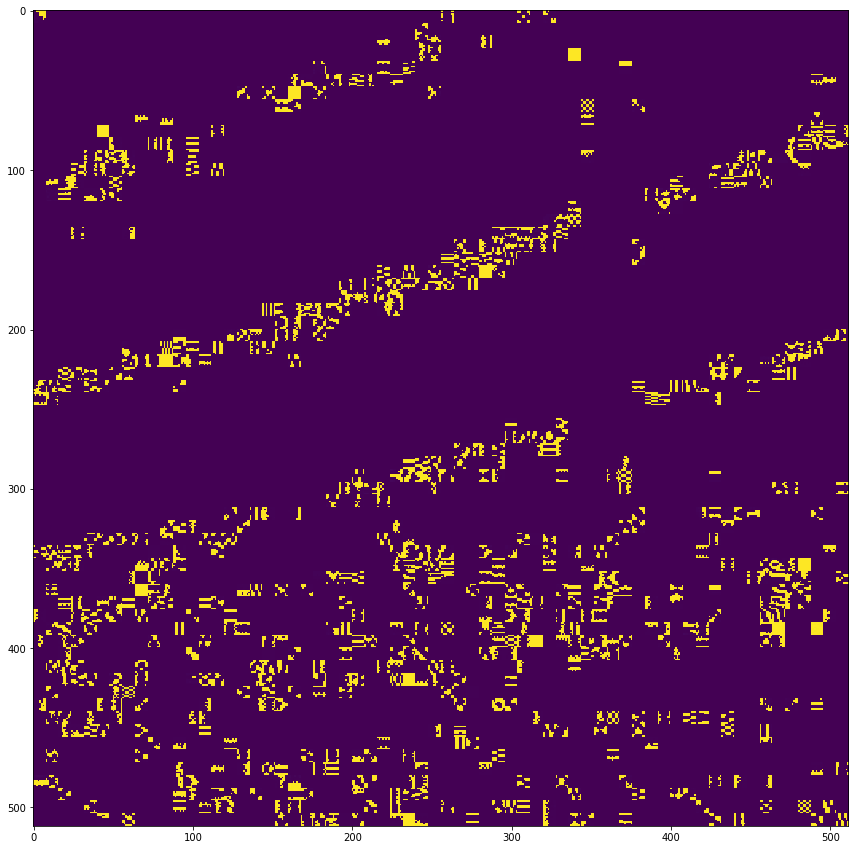

In [57]:
plt.imshow(np.max(cover, axis=2) - np.max(jmipod, axis=2))

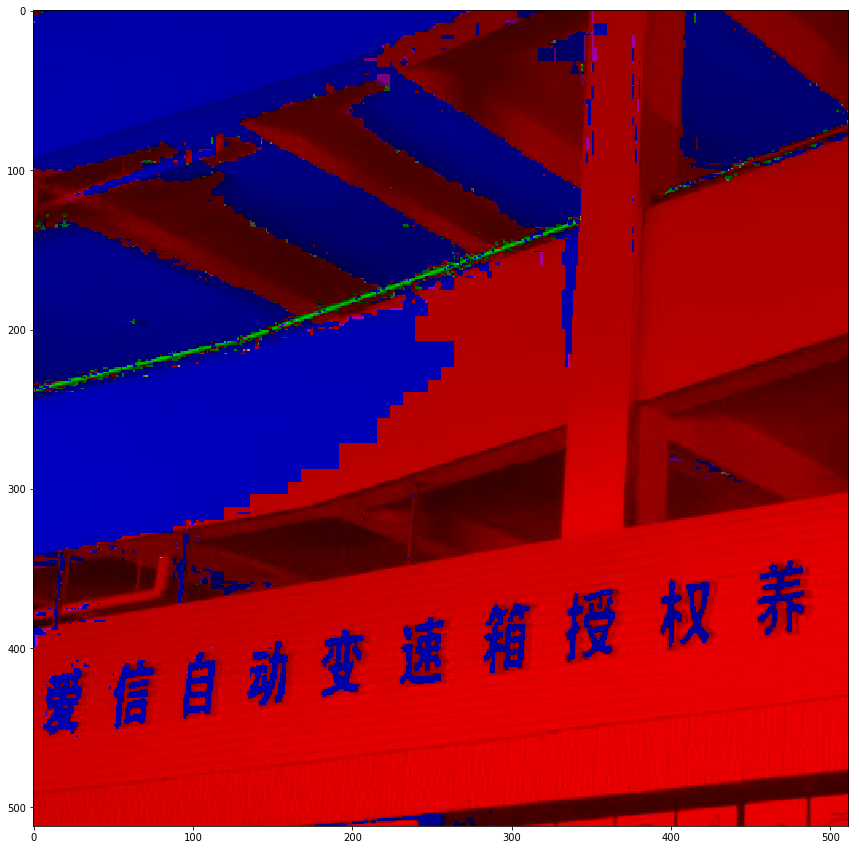

In [58]:
# split the image into its BGR components
(B, G, R) = cv2.split(cover)
# find the maximum pixel intensity values for each
# (x, y)-coordinate,, then set all pixel values less
# than M to zero
M = np.maximum(np.maximum(R, G), B)
R[R < M] = 0
G[G < M] = 0
B[B < M] = 0
# merge the channels back together and return the image
plt.imshow(cv2.merge([B, G, R]))

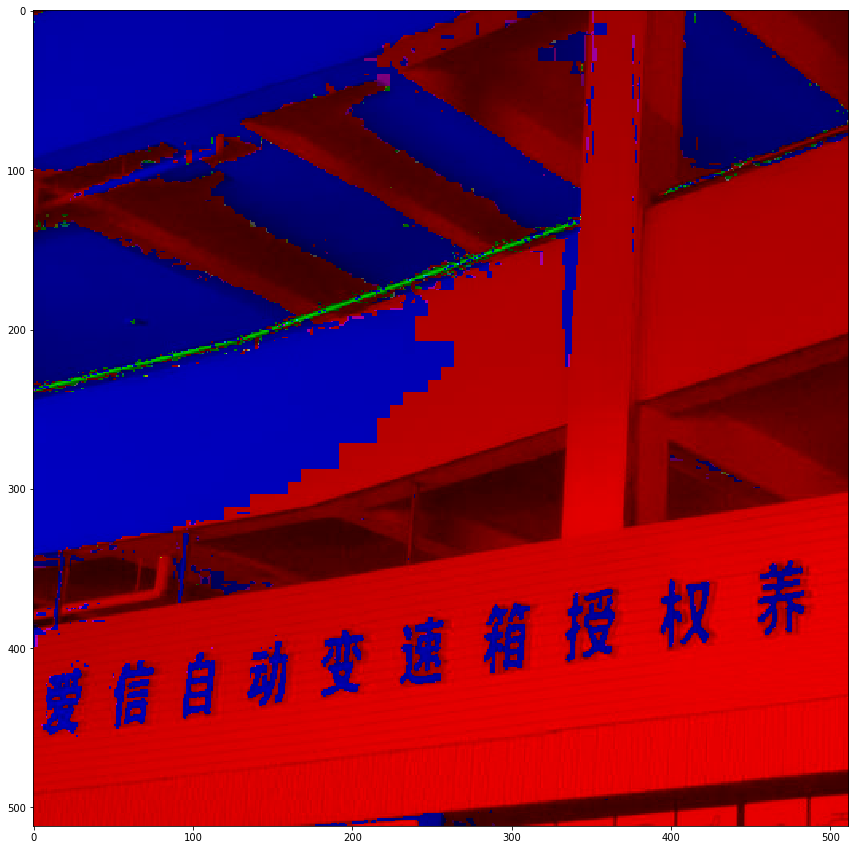

In [59]:
# split the image into its BGR components
(B, G, R) = cv2.split(jmipod)
# find the maximum pixel intensity values for each
# (x, y)-coordinate,, then set all pixel values less
# than M to zero
M = np.maximum(np.maximum(R, G), B)
R[R < M] = 0
G[G < M] = 0
B[B < M] = 0
# merge the channels back together and return the image
plt.imshow(cv2.merge([B, G, R]))

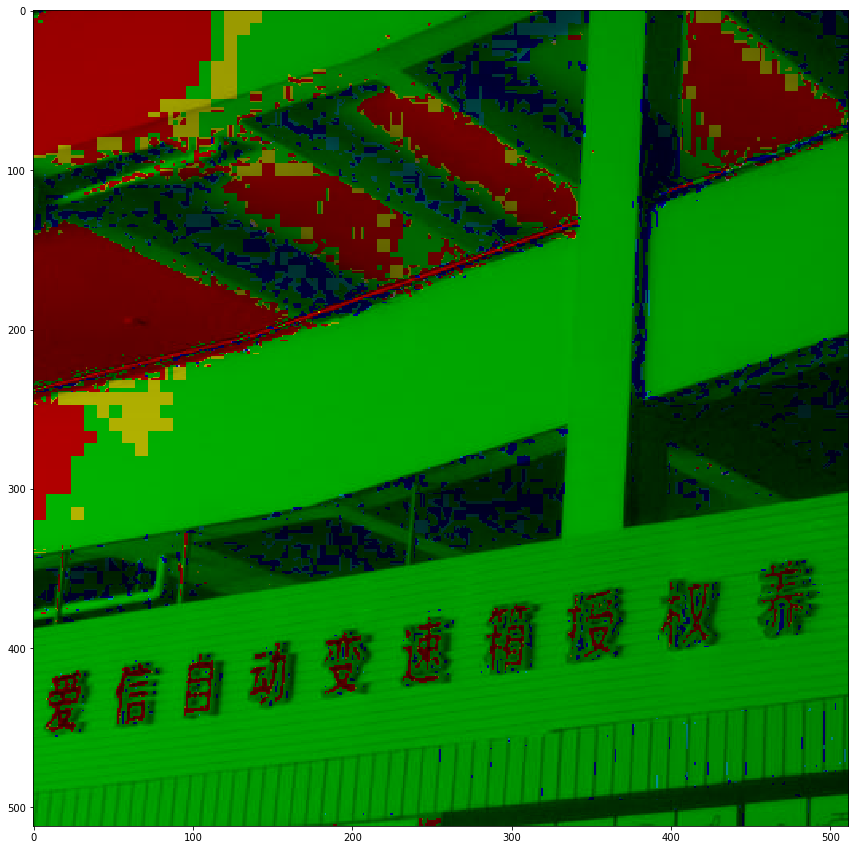

In [60]:
# split the image into its BGR components
(B, G, R) = cv2.split(cover)
# find the maximum pixel intensity values for each
# (x, y)-coordinate,, then set all pixel values less
# than M to zero
M = np.minimum(np.minimum(R, G), B)
R[R > M] = 0
G[G > M] = 0
B[B > M] = 0
# merge the channels back together and return the image
plt.imshow(cv2.merge([B, G, R]))

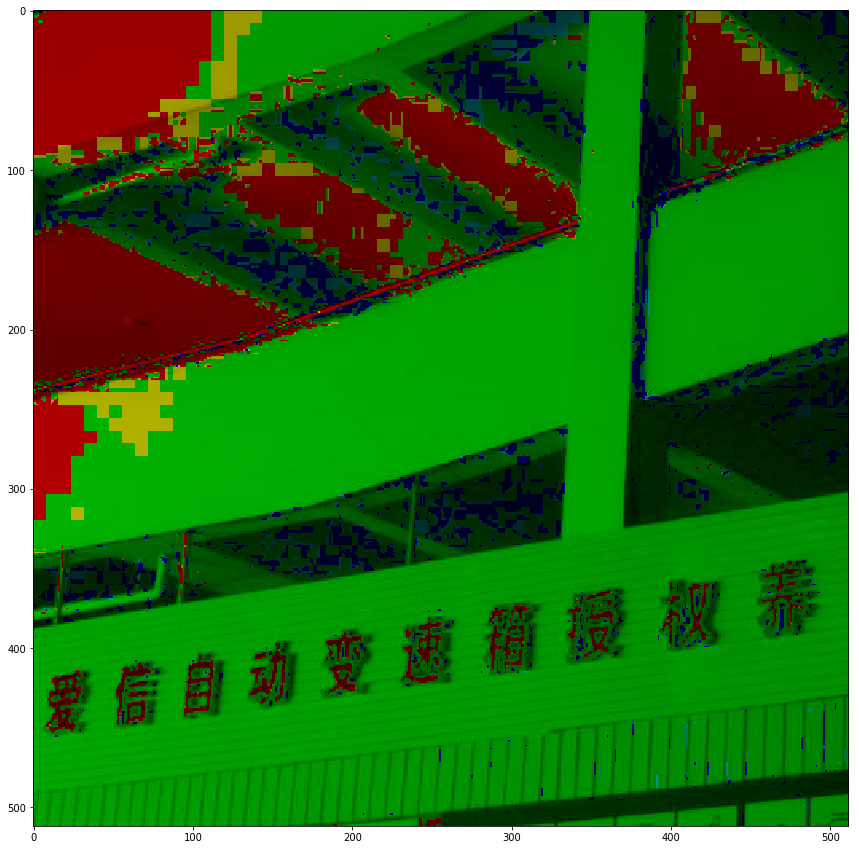

In [61]:
# split the image into its BGR components
(B, G, R) = cv2.split(jmipod)
# find the minimum pixel intensity values for each
# (x, y)-coordinate,, then set all pixel values greater
# than M to zero
M = np.minimum(np.minimum(R, G), B)
R[R > M] = 0
G[G > M] = 0
B[B > M] = 0
# merge the channels back together and return the image
plt.imshow(cv2.merge([B, G, R]))

In [46]:
import requests
import zipfile
import os
home = os.path.expanduser("~")
user = home.split('/')[-1]

url = 'http://dde.binghamton.edu/download/alaska/models.zip'
local = home + '/alaska/models.zip'

r = requests.get(url)
with open(local, 'wb') as f:
    for chunk in tqdm(r.iter_content(chunk_size=2**10)): 
        if chunk:
            f.write(chunk)
with zipfile.ZipFile(local, 'r') as zipref:
    zipref.extractall(home + '/alaska/')
    
os.remove(local)

KeyboardInterrupt: 